In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

baseInteira = pd.read_csv('basenova.csv', sep=';')

baseInteira.head()

,id_items,id_pedido,Data_pedido,diaSemana,interSemana,DiaSemanaStr,id_cliente,Gender,Age,colAge,id_restaurante,tip_culinaria,item_menu,tip_pedido,Qde,price,total_value
0,1,1,44927,1,fimSemana,1,139,Feminino,36,31-40,9,Portuguesa,73,Bebida Alcoolica,6,"8,333333333",50
1,2,1,44927,1,fimSemana,1,139,Feminino,36,31-40,9,Portuguesa,13,Prato,2,100,200
2,3,2,44927,1,fimSemana,1,295,Masculino,36,31-40,8,Francesa,18,Prato,1,78,78
3,4,2,44927,1,fimSemana,1,295,Masculino,36,31-40,8,Francesa,103,Sobremesa,1,"120,0757911","120,0757911"
4,5,3,44927,1,fimSemana,1,584,Masculino,36,31-40,3,Americana,3,Prato,1,72,72


In [24]:
baseDropada = baseInteira.drop(columns=['id_items','id_pedido','Data_pedido','DiaSemanaStr', 'diaSemana', 'Age', 'item_menu','id_cliente', 'tip_culinaria', 'Qde', 'price', 'total_value', 'id_restaurante'])

baseDropada.replace('36', '40')


baseDropada.head()

,interSemana,Gender,colAge,tip_pedido
0,fimSemana,Feminino,31-40,Bebida Alcoolica
1,fimSemana,Feminino,31-40,Prato
2,fimSemana,Masculino,31-40,Prato
3,fimSemana,Masculino,31-40,Sobremesa
4,fimSemana,Masculino,31-40,Prato


In [25]:
#Pré-processamento: tratamento de dados inconsistentes ou redundantes
#Remove dados duplicados, que para fim estátisticos são irrelevantes
orders_duplicates = baseDropada [ baseDropada.duplicated(subset=['Gender', 'interSemana','colAge', 'tip_pedido'], keep=False)]

if len(orders_duplicates) > 0:
  print('\nAmostras redudantes ou inconsistentes:\n')
  print(orders_duplicates)
else: print('\nNão existem amostras redudantes ou inconsistentes')




Amostras redudantes ou inconsistentes:

      interSemana     Gender colAge           tip_pedido
0       fimSemana   Feminino  31-40     Bebida Alcoolica
1       fimSemana   Feminino  31-40                Prato
2       fimSemana  Masculino  31-40                Prato
3       fimSemana  Masculino  31-40            Sobremesa
4       fimSemana  Masculino  31-40                Prato
...           ...        ...    ...                  ...
72634   fimSemana   Feminino  18-30  Bebida não Alcolica
72635   fimSemana   Feminino  18-30                Prato
72636   fimSemana  Masculino  41-50                Prato
72637   fimSemana  Masculino  51-60     Bebida Alcoolica
72638   fimSemana  Masculino  51-60                Prato

[72639 rows x 4 columns]


In [5]:
# 


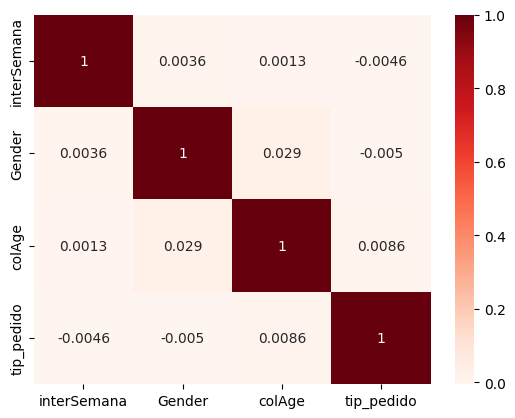

In [26]:
baseDropada.loc[baseDropada['Gender'] == 'Feminino', 'Gender'] = 0
baseDropada.loc[baseDropada['Gender'] == 'Masculino', 'Gender'] = 1
baseDropada.loc[baseDropada['tip_pedido'] == 'Prato', 'tip_pedido'] = 0
baseDropada.loc[baseDropada['tip_pedido'] == 'Bebida Alcoolica', 'tip_pedido'] = 1
baseDropada.loc[baseDropada['tip_pedido'] == 'Bebida não Alcolica', 'tip_pedido'] = 2
baseDropada.loc[baseDropada['tip_pedido'] == 'Sobremesa', 'tip_pedido'] = 3
baseDropada.loc[baseDropada['interSemana'] == 'Semana', 'interSemana'] = 0
baseDropada.loc[baseDropada['interSemana'] == 'fimSemana', 'interSemana'] = 1
baseDropada.loc[baseDropada['colAge'] == '18-30', 'colAge'] = 0
baseDropada.loc[baseDropada['colAge'] == '31-40', 'colAge'] = 1
baseDropada.loc[baseDropada['colAge'] == '41-50', 'colAge'] = 2
baseDropada.loc[baseDropada['colAge'] == '51-60', 'colAge'] = 3
baseDropada.loc[baseDropada['colAge'] == '61-acima', 'colAge'] = 4

sns.heatmap(baseDropada.corr(), annot=True, cmap="Reds") 
plt.show()

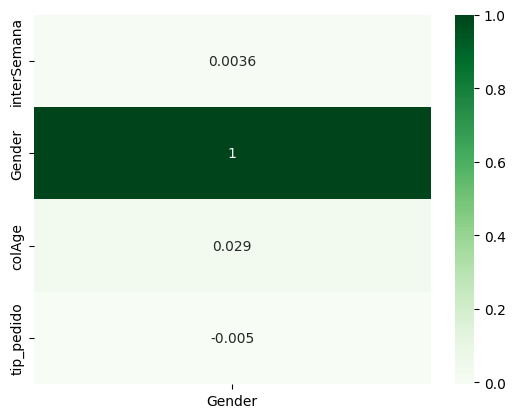

In [27]:
sns.heatmap(baseDropada.corr()[["Gender"]], annot=True, cmap="Greens")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

y = baseDropada["tip_pedido"]
x = baseDropada.drop("tip_pedido", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#cria os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [30]:
from sklearn import metrics

#cria as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

2.196368244022917e-05
-0.0009223402680706982


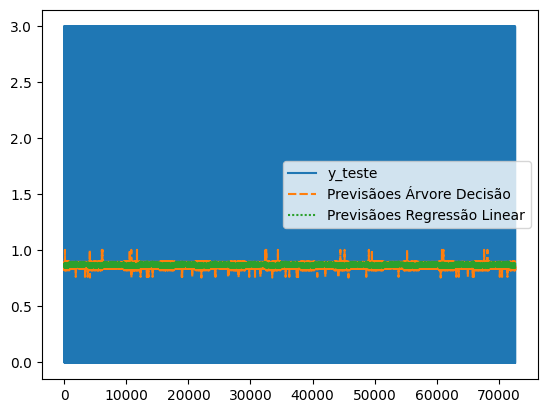

In [31]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsãoes Árvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsãoes Regressão Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()